In [26]:
!pip install keras-layer-normalization

from os.path import isfile, join
import  cv2
import keras
from keras.layers import Conv2DTranspose, ConvLSTM2D, BatchNormalization, TimeDistributed, Conv2D
from keras.models import Sequential, load_model
from keras_layer_normalization import LayerNormalization
from os import listdir
from os.path import isfile, join, isdir
from PIL import Image
import numpy as np
import shelve
import cv2 
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt

In [27]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
MODEL_PATH = "/content/drive/My Drive/Colab Notebook2/UCSDped1/model.hdf5"
TEST_PATH="/content/drive/My Drive/Colab Notebook2/UCSDped1/Test/Test013" 


In [29]:
def get_test():
    sz = 200
    test = np.zeros(shape=(sz, 256, 256, 1))
    cnt = 0
    for f in sorted(listdir(TEST_PATH)):
        if str(join(TEST_PATH, f))[-3:] == "tif":
            img = Image.open(join(TEST_PATH, f)).resize((256, 256))
            img = np.array(img, dtype=np.float32) / 256.0
            test[cnt, :, :, 0] = img
            cnt = cnt + 1
    return test

In [30]:
model = load_model(MODEL_PATH,custom_objects={'LayerNormalization': LayerNormalization})
test = get_test()
sz = int(test.shape[0]/10)

sequences = np.zeros((sz, 10, 256, 256, 1))

for i in range(0, sz):
    clip = np.zeros((10, 256, 256, 1))
    for j in range(0, 10):
        clip[j] = test[i*10 + j, :, :, :]
    sequences[i] = clip

reconstructed_sequences = model.predict(sequences,batch_size=2)

In [40]:
frame_array=[]
for i in reconstructed_sequences:
    for img in i:
      img = np.array(img, dtype=np.float32) *256
      img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
      img = np.uint8(img)
      frame_array.append(img)

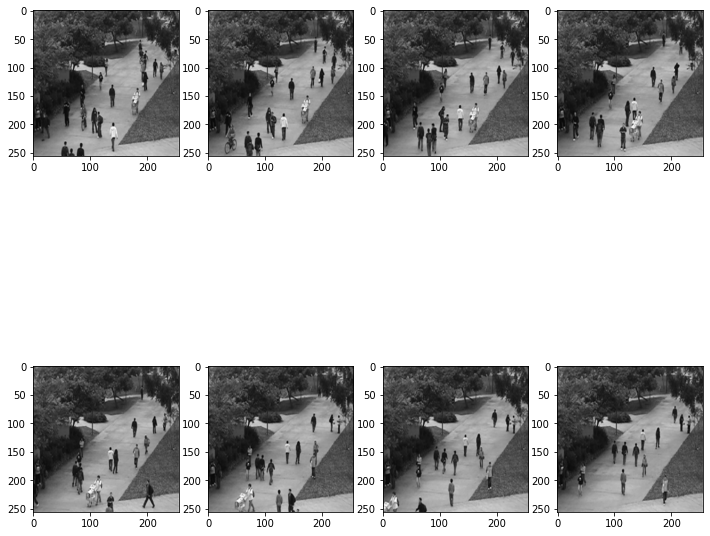

In [41]:
fig=plt.figure(figsize=(12,12))
columns = 4
rows = 2
for i in range(1, columns*rows +1):
    img = test[20*i]
    img = np.array(img, dtype=np.float32) *256
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    img = np.uint8(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

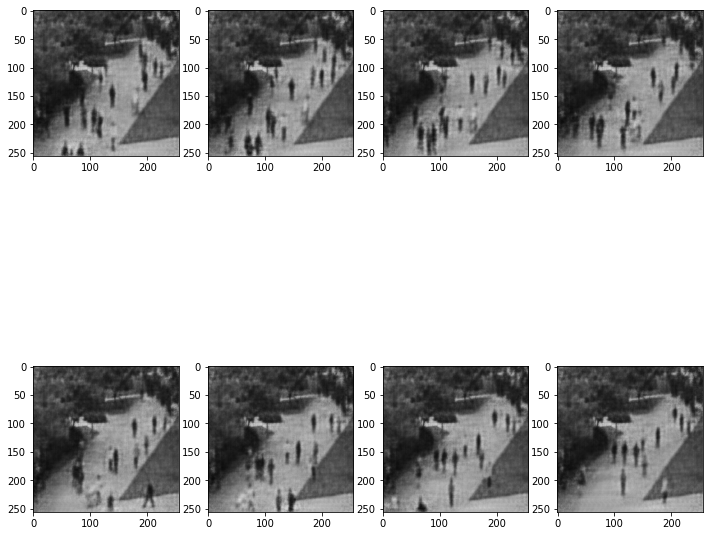

In [42]:
fig=plt.figure(figsize=(12,12))
columns = 4
rows = 2
for i in range(1, columns*rows +1):
    img = frame_array[20*i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [46]:
pathOut_original='/content/drive/My Drive/Colab Notebook2/UCSDped1/original.avi'
pathOut_reconstructed='/content/drive/My Drive/Colab Notebook2/UCSDped1/reconstructed.avi'

fps=25
size=(256,256)
out = cv2.VideoWriter(pathOut_original,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(test)):
  img = np.array(test[i], dtype=np.float32) *256
  img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
  img = np.uint8(img)
  out.write(img)
out.release()

out = cv2.VideoWriter(pathOut_reconstructed,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
  out.write(frame_array[i])
out.release()